# UBS: Exploratory Data Analysis

The <span style='color: #e74c3c; font-family: monospace; background-color: #F7F2F4;'>numpy.array</span> type provides a handy method, <span style='color: #e74c3c; font-family: monospace; background-color: #F7F2F4;'>item</span>,

1. Number of competitors
2. Number of competitors in the domicile
3. Ranking withing the owner
4. Conversion rate Followers to likes
5. Dynamics: number of uploads

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('max_columns', 200)

In [173]:
df = pd.read_csv('./skylab_instagram_datathon_dataset.csv', sep=';')

## Basic Info

In [10]:
df.shape

(704313, 15)

In [11]:
df.head()

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0


In [12]:
df.columns

Index(['period', 'period_end_date', 'compset_group', 'compset',
       'business_entity_doing_business_as_name', 'legal_entity_name',
       'domicile_country_name', 'ultimate_parent_legal_entity_name',
       'primary_exchange_name', 'calculation_type', 'followers', 'pictures',
       'videos', 'comments', 'likes'],
      dtype='object')

In [13]:
df.dtypes

period                                     object
period_end_date                            object
compset_group                              object
compset                                    object
business_entity_doing_business_as_name     object
legal_entity_name                          object
domicile_country_name                      object
ultimate_parent_legal_entity_name          object
primary_exchange_name                      object
calculation_type                           object
followers                                 float64
pictures                                  float64
videos                                    float64
comments                                  float64
likes                                     float64
dtype: object

In [14]:
df.describe()

,followers,pictures,videos,comments,likes
count,5.792580e+05,695803.000000,684349.000000,6.953430e+05,6.959770e+05
mean,1.342432e+07,344.272540,61.244426,3.043246e+04,2.163189e+06
std,1.106975e+08,2777.396873,564.468480,2.766459e+05,1.803193e+07
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,3.013372e+05,19.000000,2.000000,3.710000e+02,1.727700e+04
50%,1.104144e+06,44.000000,7.000000,1.435000e+03,9.318400e+04
75%,4.479325e+06,122.000000,20.000000,5.872000e+03,4.577470e+05
max,3.502565e+09,141746.000000,35905.000000,1.732046e+07,7.120711e+08


### Data Transformation

**QUESTION:** do we have missing weeks?

In [111]:
df['period_end_date'] = pd.to_datetime(df['period_end_date'])

In [112]:
df.groupby('compset').count()['period_end_date']

compset
Alcohol                                  13367
Apparel Retail                           69341
Athleisure                                7433
Beauty & Boutique                        44266
Beverages                                20053
Building Products                         4376
Casual Dining                             6751
Coffee                                    2275
Dermatology                               2824
Dermatology and Orthodontics              3682
Discount Retailers                        2100
Ecommerce Apparel Retail                 19614
Ecommerce Luxury Apparel Retail           5741
Ecommerce Mainstream Apparel Retail       9463
Energy drinks                             2678
Entertainment                             1215
Fast Casual                               3185
Fast Fashion                             19281
Fitness & Exercise                        8978
Food Products                            20396
Food Retail                               2574
Footw

### Missing Values

In [113]:
df.isna().sum()* 100 / len(df)

period                                     0.000000
period_end_date                            0.000000
compset_group                              0.000000
compset                                    0.000000
business_entity_doing_business_as_name     0.000000
legal_entity_name                          3.940720
domicile_country_name                     34.888466
ultimate_parent_legal_entity_name          3.940720
primary_exchange_name                     34.888466
calculation_type                           0.000000
followers                                 17.755600
pictures                                   1.208270
videos                                     2.834535
comments                                   1.273581
likes                                      1.183565
dtype: float64

In [18]:
df["compset"].value_counts()

US Softlines Analyst Interest List      113744
Apparel Retail                           69341
Luxury & Premium & Mainstream            64541
Beauty & Boutique                        44266
Global Luxury Analysts Interest List     29233
Omnichannel Apparel Retail               25049
Sportswear & Athleisure                  20900
Food Products                            20396
Beverages                                20053
Ecommerce Apparel Retail                 19614
Fast Fashion                             19281
Soft Luxury                              19170
Restaurants                              18117
Hard Luxury                              14955
Alcohol                                  13367
Sportswear                               12711
Premium Brands                           12125
Footwear                                 11731
Ecommerce Mainstream Apparel Retail       9463
Fitness & Exercise                        8978
Mid-Range Watch & Jewelry                 8924
Outdoor Gear 

In [20]:
df["period"].value_counts()

Weekly    704313
Name: period, dtype: int64

# Relationshit between categorical variables

In [114]:
cat_vars = ["compset_group", "compset", "business_entity_doing_business_as_name",
"legal_entity_name", "domicile_country_name", "ultimate_parent_legal_entity_name",
"primary_exchange_name"]

### Cleaning

1. "domicile_country_name": ;, ;France, Hong Kong
2. business_entity_doing_business_as_name: get rid of all brands
3. "primary_exchange_name": ; - NA, ;Euronext Paris 
    - what is 'Asx - All Markets',
    - 'Nyse Euronext - Euronext Brussels' vs 'Nyse Euronext - Euronext Brussels;',
4. "ultimate_parent_legal_entity_name":
    - ' DO NOT USE': NA
    - 'Anheuser-Busch' vs 'Anheuser-Busch;Anheuser-Busch',
    
sorted(list(df["domicile_country_name"].value_counts().keys()))

**Questions:** 

NEW VAR:
1. sum(df["ultimate_parent_legal_entity_name"] != df["legal_entity_name"]) / len(df)
2. sum(df["ultimate_parent_legal_entity_name"] != df["business_entity_doing_business_as_name"])
3. sum(df["legal_entity_name"] != df["business_entity_doing_business_as_name"])

# df["compset_group"].value_counts()

In [178]:
len(df.drop_duplicates(['legal_entity_name'])) 

424

In [183]:
df.drop_duplicates(['business_entity_doing_business_as_name', 'legal_entity_name']).groupby('business_entity_doing_business_as_name').count()['legal_entity_name'].max()

1

In [185]:
df.drop_duplicates(['business_entity_doing_business_as_name', 'legal_entity_name']).groupby('legal_entity_name').count()['business_entity_doing_business_as_name'].sort_values()

legal_entity_name
ACON Investments LLC                    1
Ollie's Outlet                          1
Olive Garden                            1
Olaplex Holdings Inc                    1
Oatly                                   1
                                       ..
Richemont                              13
Estee Lauder                           15
Anheuser-Busch                         18
L'Oreal                                18
LVMH Moet Hennessy Louis Vuitton SE    23
Name: business_entity_doing_business_as_name, Length: 423, dtype: int64

In [121]:
#sorted(list(df["business_entity_doing_business_as_name"].value_counts().keys()))
sum(df["business_entity_doing_business_as_name"] == df["legal_entity_name"]) / len(df)

0.21097722177497788

In [120]:
sum(df["business_entity_doing_business_as_name"] == df["ultimate_parent_legal_entity_name"])/ len(df)

0.15092863542203538

In [119]:
sum(df["legal_entity_name"] == df["ultimate_parent_legal_entity_name"])/ len(df)

0.790783359103126

In [140]:
sum((df["legal_entity_name"] == df["ultimate_parent_legal_entity_name"]) & (df["legal_entity_name"] == df["business_entity_doing_business_as_name"]))/ len(df)

0.15092863542203538

In [262]:
#!pip install matplotlib_venn

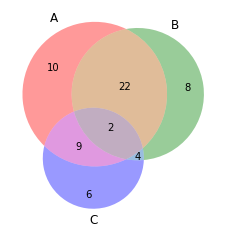

In [139]:
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (10, 8, 22, 
                 6, 9, 4, 
                 2))
plt.show()

In [138]:
df["legal_entity_name"].value_counts()

LVMH Moet Hennessy Louis Vuitton SE                 27576
Richemont                                           21580
Swatch                                              18860
Anheuser-Busch                                      12644
Kering                                              10660
                                                    ...  
Aga Marvel                                            216
WhaleCo Inc                                            55
Goodwill Industries of Orange County                   52
Shenzhen Seulin Culture & Entertainment Co., Ltd       46
Pop Mart International Group Ltd                       46
Name: legal_entity_name, Length: 423, dtype: int64

In [141]:
sum(df["ultimate_parent_legal_entity_name"] != df["primary_exchange_name"]) / len(df)

1.0

In [97]:
df["ultimate_parent_legal_entity_name"].value_counts()

LVMH Moet Hennessy Louis Vuitton SE                 27576
Richemont                                           21580
Swatch                                              18860
Anheuser-Busch                                      12644
Kering                                              10660
                                                    ...  
Aga Marvel                                            216
Pinduoduo                                              55
Goodwill Industries International Inc                  52
Pop Mart International Group Ltd                       46
Shenzhen Seulin Culture & Entertainment Co., Ltd       46
Name: ultimate_parent_legal_entity_name, Length: 401, dtype: int64

In [142]:
#sorted(list(df["ultimate_parent_legal_entity_name"].value_counts().keys()))

In [143]:
#sorted(list(df["primary_exchange_name"].value_counts().keys()))

In [263]:
sorted(list(df["domicile_country_name"].value_counts().keys()))

[';',
 ';France',
 'Australia',
 'Belgium',
 'Belgium;',
 'Brazil',
 'Canada',
 'China',
 'China;Hong Kong',
 'Denmark',
 'France',
 'Germany',
 'Hong Kong',
 'Italy',
 'Japan',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Philippines',
 'Poland',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America']

In [261]:
#df["primary_exchange_name"].value_counts() 

In [35]:
pd.crosstab(df["compset_group"], df["compset"]).

compset,Alcohol,Apparel Retail,Athleisure,Beauty & Boutique,Beverages,Building Products,Casual Dining,Coffee,Dermatology,Dermatology and Orthodontics,Discount Retailers,Ecommerce Apparel Retail,Ecommerce Luxury Apparel Retail,Ecommerce Mainstream Apparel Retail,Energy drinks,Entertainment,Fast Casual,Fast Fashion,Fitness & Exercise,Food Products,Food Retail,Footwear,Global Luxury Analysts Interest List,Hard Luxury,Home Appliances,Latam Apparel Retail,Luxury & Premium & Mainstream,Mainstream Brands,Mattress,Mid-Range Watch & Jewelry,Omnichannel Apparel Retail,Orthodontics,Outdoor Gear,Pasta Sauce,Petcare,Plant-Based Dairy,Plant-Based Meat,Premium Brands,QSR,Restaurants,Snack Bars,Soda,Soft Luxury,Sporting Goods,Sports drinks,Sportswear,Sportswear & Athleisure,Study (All Brands),Toys & Collectibles,US Department Store,US Discount Store,US Softlines Analyst Interest List,Workout Gear,Yoghurt
compset_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apparel Retail,0,69341,810,0,0,0,0,0,0,0,0,19614,5741,9463,0,0,0,19281,0,0,0,4059,0,0,0,3640,0,0,0,1529,25049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5005,4849,41192,0,0
Beauty & Boutique,0,0,0,44266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Beverages,13367,0,0,0,20053,0,0,0,0,0,0,0,0,0,2678,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3562,0,0,1811,0,0,0,0,0,0,0,0,0
Building Products,0,0,0,0,0,4376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dermatology and Orthodontics,0,0,0,0,0,0,0,0,2824,3682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Discount Retailers,0,0,0,0,0,0,0,0,0,0,2100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Entertainment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fitness & Exercise,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Food Products,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20396,0,0,0,0,0,0,0,0,0,0,0,0,0,2495,0,4843,7618,0,0,0,4075,0,0,0,0,0,0,0,0,0,0,0,0,3185


**Question**: how many compsets can be in one compset_group?
- Up to 13
- on average 3.05
- min 

In [260]:
#df.drop_duplicates(["compset_group", "compset"]).groupby("compset_group").count()["compset"]

In [41]:
df.drop_duplicates(["compset_group", "compset"]).groupby("compset_group").count()["compset"].value_counts()

1     12
5      2
6      2
13     1
3      1
9      1
2      1
Name: compset, dtype: int64

**Question**: how many compset_groups can be in one compset_group?

1. We have 4 insteresting cases where more than 1 compset group!

In [43]:
df.drop_duplicates(["compset_group", "compset"]).groupby("compset").count()["compset_group"].value_counts()

1    50
2     2
3     1
4     1
Name: compset_group, dtype: int64

In [44]:
df[cat_vars].head()

,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name
0,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange
1,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange
2,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange
3,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange
4,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange


**Hypothesis**

BE -> (1) Legal Entity
BE -> (1) Domicile Country
LegalE <-> Domicile Country

PrimaryExchangeName = Ultimate Parent 

In [64]:
#df[["ultimate_parent_legal_entity_name", "primary_exchange_name"]].drop_duplicates()
def check_max_correspondence(varname1, varname2, varname1Str="max1", varname2Str = "max2", df=df):
    max1=df.drop_duplicates([varname1, varname2]).groupby(varname1).count()[varname2].max()
    max2=df.drop_duplicates([varname1, varname2]).groupby(varname2).count()[varname1].max()
    print(f"For each {varname1Str} there is up to {max1} of {varname2Str}")
    print(f"For each {varname2Str} there is up to {max2} of {varname1Str}")
    return {varname1Str : max1, varname2Str: max2}
    
check_max_correspondence("ultimate_parent_legal_entity_name", "primary_exchange_name",
                         "ultimate_parent_legal_entity_name", "primary_exchange_name")

For each ultimate_parent_legal_entity_name there is up to 2 of primary_exchange_name
For each primary_exchange_name there is up to 68 of ultimate_parent_legal_entity_name


{'ultimate_parent_legal_entity_name': 2, 'primary_exchange_name': 68}

In [ ]:
df.drop_duplicates([varname1, varname2]).groupby(varname1).count()[varname2].max

In [170]:
check_max_correspondence("business_entity_doing_business_as_name", "domicile_country_name",
                         "business_entity_doing_business_as_name", "domicile_country_name")

For each business_entity_doing_business_as_name there is up to 1 of domicile_country_name
For each domicile_country_name there is up to 122 of business_entity_doing_business_as_name


{'business_entity_doing_business_as_name': 1, 'domicile_country_name': 122}

In [169]:
check_max_correspondence("legal_entity_name", "domicile_country_name",
                         "legal_entity_name", "domicile_country_name")

For each legal_entity_name there is up to 1 of domicile_country_name
For each domicile_country_name there is up to 122 of legal_entity_name


{'legal_entity_name': 1, 'domicile_country_name': 122}

In [168]:
check_max_correspondence("legal_entity_name", "compset",
                         "legal_entity_name", "compset")

For each legal_entity_name there is up to 10 of compset
For each compset there is up to 158 of legal_entity_name


{'legal_entity_name': 10, 'compset': 158}

In [167]:
check_max_correspondence("business_entity_doing_business_as_name", "compset",
                         "business_entity_doing_business_as_name", "compset")

For each business_entity_doing_business_as_name there is up to 10 of compset
For each compset there is up to 158 of business_entity_doing_business_as_name


{'business_entity_doing_business_as_name': 10, 'compset': 158}

In [174]:
check_max_correspondence("legal_entity_name", "business_entity_doing_business_as_name",
                         "legal_entity_name", "business_entity_doing_business_as_name")

For each legal_entity_name there is up to 1 of business_entity_doing_business_as_name
For each business_entity_doing_business_as_name there is up to 1 of legal_entity_name


{'legal_entity_name': 1, 'business_entity_doing_business_as_name': 1}

In [165]:
df.drop_duplicates(["legal_entity_name", "business_entity_doing_business_as_name"]).groupby(varname1).count()[varname2]

NameError: name 'varname1' is not defined

In [166]:
check_max_correspondence("compset_group", "business_entity_doing_business_as_name",
                         "compset_group", "business_entity_doing_business_as_name")                        

For each compset_group there is up to 111 of business_entity_doing_business_as_name
For each business_entity_doing_business_as_name there is up to 3 of compset_group


{'compset_group': 111, 'business_entity_doing_business_as_name': 3}

In [80]:
df.drop_duplicates(["compset_group", "business_entity_doing_business_as_name"]).groupby("business_entity_doing_business_as_name").count()["compset_group"].sort_values()

business_entity_doing_business_as_name
24S                   1
Pedigree              1
Peloton               1
Peoples Jewellers     1
Pepsi                 1
                     ..
Five Below            1
Flywheel Sports       1
Field Roast           1
shopDisney            1
All Brands           20
Name: compset_group, Length: 706, dtype: int64

Data Cleaning:
1. ; is an na in the county
2. ;France to France
3. China;Hong Kong => Honking

In [60]:
df["domicile_country_name"].value_counts()

United States of America                                193509
France                                                   62164
Switzerland                                              44746
United Kingdom of Great Britain and Northern Ireland     31368
Brazil                                                   17243
Hong Kong                                                16151
Japan                                                    15357
Germany                                                  13438
Belgium                                                  12644
Italy                                                    10416
Spain                                                    10010
Netherlands                                               6280
Canada                                                    6170
Sweden                                                    5460
Australia                                                 4004
New Zealand                                            

In [284]:
df.loc[df["domicile_country_name"] == "Belgium;"]

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes,total_involvement,total_company_activity,conversion_total,conversion_rate_total,likes_per_picture,likes_per_video,comments_per_picture,comments_per_video,content_type,ratio_of_videos,ratio_of_pictures
577535,Weekly,2023-01-28,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,134791.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577536,Weekly,2022-01-01,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,96571.0,11.0,0.0,194.0,2123.0,2317.0,2134.0,0.023993,0.023993,193.00,NaN,17.636364,NaN,0.0,0.0,1.0
577537,Weekly,2016-10-01,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577538,Weekly,2019-10-19,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,76904.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577539,Weekly,2022-06-25,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,106107.0,1.0,0.0,6.0,84.0,90.0,85.0,0.000848,0.000848,84.00,NaN,6.000000,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578336,Weekly,2020-01-04,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,76975.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578337,Weekly,2020-04-25,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,76505.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578338,Weekly,2016-04-09,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578339,Weekly,2018-05-05,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,NaN,4.0,0.0,86.0,3289.0,3375.0,3293.0,NaN,NaN,822.25,NaN,21.500000,NaN,0.0,0.0,1.0


In [285]:
df.loc[[577535, 577536]]

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes,total_involvement,total_company_activity,conversion_total,conversion_rate_total,likes_per_picture,likes_per_video,comments_per_picture,comments_per_video,content_type,ratio_of_videos,ratio_of_pictures
577535,Weekly,2023-01-28,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,134791.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577536,Weekly,2022-01-01,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,Metric Value,96571.0,11.0,0.0,194.0,2123.0,2317.0,2134.0,0.023993,0.023993,193.0,NaN,17.636364,NaN,0.0,0.0,1.0


## Some new vars creation

In [152]:
df.drop_duplicates(["business_entity_doing_business_as_name"]).groupby(["business_entity_doing_business_as_name"]).count()["compset"]

business_entity_doing_business_as_name
24S                  1
3.1 Phillip Lim      1
3CE                  1
A. Lange & Soehne    1
ANIMALE              1
                    ..
bareMinerals         1
dd's Discounts       1
e.l.f.               1
iRobot               1
shopDisney           1
Name: compset, Length: 706, dtype: int64

In [186]:
#df.drop_duplicates(["compset", "compset_group"]).groupby(["compset"]).count()["compset_group"].sort_values()

In [161]:
for i in cat_vars:
    unique_vals = len(df.drop_duplicates([i]))
    print(f"{i}: {unique_vals}")

compset_group: 20
compset: 54
business_entity_doing_business_as_name: 706
legal_entity_name: 424
domicile_country_name: 27
ultimate_parent_legal_entity_name: 402
primary_exchange_name: 31


# Conversion Rate Variable Creation

In [264]:
df.head(5)

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes,total_involvement,total_company_activity,conversion_total,conversion_rate_total,likes_per_picture,likes_per_video,comments_per_picture,comments_per_video
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0,6128444.0,6112302.0,0.277730,0.277730,63012.422680,4.701696e+05,167.412371,1249.153846
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0,3202502.0,3189198.0,0.131845,0.131845,59058.222222,1.594572e+06,247.370370,6679.000000
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0,2168849.0,2152997.0,0.303869,0.303869,51260.833333,2.691194e+05,378.428571,1986.750000
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0,5251678.0,5224989.0,0.277850,0.277850,71574.191781,5.805462e+05,366.602740,2973.555556
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0,5786668.0,5761041.0,0.191286,0.191286,106684.944444,5.760987e+05,475.574074,2568.100000


**Assumtion**

1. the likes and the comments are for the videos from the same week

In [277]:
engagement_vars = ["followers", "pictures", "videos", "comments", "likes"]
df_contin = df[engagement_vars].copy()

# total involeveme
df["total_involvement"] = df["comments"] + df["likes"]
df["total_company_activity"] = df["pictures"] + df["likes"]

df["conversion_rate_total"] = df["total_involvement"] / df["followers"]

# COntent type
df["ratio_of_videos"] = df["videos"] / (df["pictures"] + df["videos"])
df["ratio_of_pictures"] = df["pictures"] / (df["pictures"] + df["videos"])

# ASSUMTION: we only like videos / photos from this week
df["likes_per_picture"] = df["likes"] / df["pictures"]
df["likes_per_video"] =   df["likes"] / df["videos"]
df["comments_per_picture"] =  df["comments"] / df["pictures"] 
df["comments_per_video"] =   df["comments"] / df["videos"]

# take care of zeros
df.loc[df["pictures"] + df["videos"] == 0, "ratio_of_videos"] = np.nan
df.loc[df["pictures"] + df["videos"] == 0, "ratio_of_pictures"] = np.nan

df.loc[df["pictures"] == 0, "likes_per_picture"] = np.nan
df.loc[df["videos"] == 0, "likes_per_video"] = np.nan
df.loc[df["pictures"] == 0, "comments_per_picture"] = np.nan
df.loc[df["videos"] == 0, "comments_per_video"] = np.nan

In [278]:
new_vars = ["videos", "pictures", "likes", "comments", "total_involvement", "total_company_activity", "conversion_rate_total", "likes_per_picture", "likes_per_video",
           "comments_per_picture", "comments_per_video", "content_type", "ratio_of_videos", "ratio_of_pictures"]
df[new_vars].describe()

,videos,pictures,likes,comments,total_involvement,total_company_activity,conversion_rate_total,likes_per_picture,likes_per_video,comments_per_picture,comments_per_video,content_type,ratio_of_videos,ratio_of_pictures
count,684349.000000,695803.000000,6.959770e+05,6.953430e+05,6.953430e+05,6.958030e+05,571335.000000,6.822940e+05,5.904110e+05,681803.000000,5.900780e+05,671858.000000,675227.000000,675227.000000
mean,61.244426,344.272540,2.163189e+06,3.043246e+04,2.195594e+06,2.164074e+06,0.239651,8.978570e+03,9.008996e+04,110.272339,1.079813e+03,0.304412,0.170257,0.829743
std,564.468480,2777.396873,1.803193e+07,2.766459e+05,1.826839e+07,1.803673e+07,6.573920,2.443292e+04,4.153716e+05,467.846213,6.409057e+03,0.831057,0.173016,0.173016
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.000000,19.000000,1.727700e+04,3.710000e+02,1.826200e+04,1.734900e+04,0.049821,4.764973e+02,2.642609e+03,10.742857,6.306667e+01,0.047619,0.045714,0.759259
50%,7.000000,44.000000,9.318400e+04,1.435000e+03,9.615600e+04,9.333400e+04,0.117294,1.693437e+03,1.176950e+04,29.121212,1.870357e+02,0.136364,0.121212,0.878788
75%,20.000000,122.000000,4.577470e+05,5.872000e+03,4.670355e+05,4.581020e+05,0.243321,6.807873e+03,5.349414e+04,83.333333,5.940000e+02,0.312500,0.240741,0.954286
max,35905.000000,141746.000000,7.120711e+08,1.732046e+07,7.203395e+08,7.121634e+08,2892.755136,1.660860e+06,3.488018e+07,32546.791667,1.218564e+06,45.000000,1.000000,1.000000


**Observation**

1. There is more envolvement for videos than for images
2. There are more likes than comments

In [257]:
#np.repeat("like", len())
ratio = pd.concat([df["likes_per_picture"], df["likes_per_video"], 
          df["comments_per_picture"], df["comments_per_video"]])

activity = pd.concat([pd.Series(np.repeat("like", len(df))), pd.Series(np.repeat("like", len(df))),
          pd.Series(np.repeat("comment", len(df))), pd.Series(np.repeat("comment", len(df)))])

content = pd.concat([pd.Series(np.repeat("picture", len(df))), pd.Series(np.repeat("video", len(df))),
          pd.Series(np.repeat("picture", len(df))), pd.Series(np.repeat("video", len(df)))])

#df_help = pd.DataFrame

d = {'ratio': ratio, 'activity': activity, 'content': content }
df_help = pd.DataFrame(data=d)
df_help 

,ratio,activity,content
0,63012.422680,like,picture
1,59058.222222,like,picture
2,51260.833333,like,picture
3,71574.191781,like,picture
4,106684.944444,like,picture
...,...,...,...
704308,158.875000,comment,video
704309,882.000000,comment,video
704310,48.485714,comment,video
704311,986.000000,comment,video


In [ ]:
**Are**

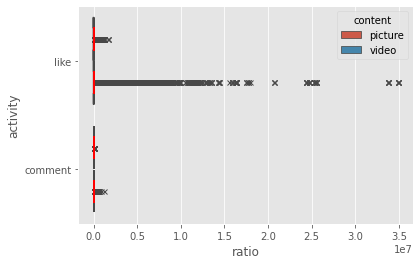

In [266]:
sns.boxplot(data=df_help, x="ratio", y="activity", hue="content",
           notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2})
ax.set_yscale('log')
plt.show()

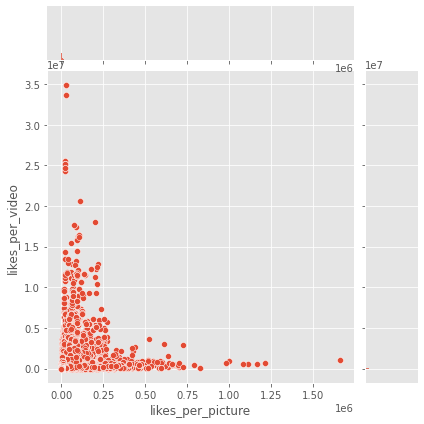

In [259]:
sns.jointplot(data=df, x="likes_per_picture", y="likes_per_video")
plt.show()

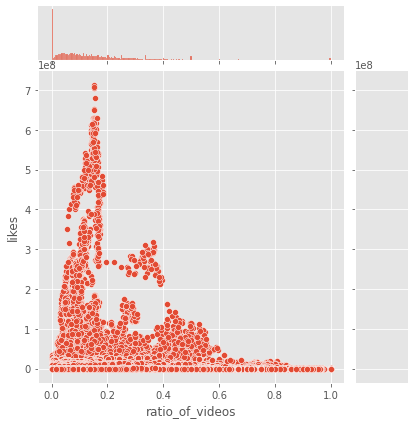

In [280]:
sns.jointplot(data=df, x="ratio_of_videos", y="likes")
plt.show()

In [216]:
df.head()

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes,total_involvement,total_company_activity,conversion_total
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0,6128444.0,6112302.0,1.002641
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0,3202502.0,3189198.0,1.004172
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0,2168849.0,2152997.0,1.007363
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0,5251678.0,5224989.0,1.005108
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0,5786668.0,5761041.0,1.004448


In [281]:
#df.groupby(["business_entity_doing_business_as_name"]).max()["followers"].sort_values()

In [220]:
#df.groupby(["business_entity_doing_business_as_name"]).sum()["likes"].sort_values()

business_entity_doing_business_as_name
Boca                 4.146400e+04
Dysport              7.061400e+04
ShopGoodwill         9.373600e+04
Finding Unicorn      1.005700e+05
Meow Mix             1.090440e+05
                         ...     
Adidas               1.503993e+10
SHEIN                1.639037e+10
Victoria's Secret    2.136851e+10
Fashion Nova         4.437581e+10
All Brands           1.011369e+12
Name: likes, Length: 706, dtype: float64

In [ ]:
#sns.pairplot(df[engagement_vars])

In [282]:
new_vars = ["followers", "videos", "pictures", "likes", "comments", "total_involvement", "total_company_activity", 
            "conversion_rate_total", "likes_per_picture", "likes_per_video",
            "comments_per_picture", "comments_per_video", 
            "ratio_of_videos", "ratio_of_pictures"]

corr = df[new_vars].corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
#f, ax = plt.subplots(figsize=(10, 8))
#sns.heatmap(corr,
#    cmap=sns.diverging_palette(220, 10, as_cmap=True),
#    vmin=0, vmax=1.0,
#    square=True, ax=ax)

/var/folders/xx/6tz780r13t57q640kxzkc46w0000gn/T/ipykernel_47719/2489022727.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,followers,videos,pictures,likes,comments,total_involvement,total_company_activity,conversion_rate_total,likes_per_picture,likes_per_video,comments_per_picture,comments_per_video,ratio_of_videos,ratio_of_pictures
followers,1.00,0.84,0.85,0.79,0.78,0.80,0.80,-0.00,0.04,0.01,0.01,-0.00,-0.00,0.00
videos,0.84,1.00,0.85,0.74,0.75,0.74,0.74,0.00,-0.01,-0.02,-0.00,-0.01,0.04,-0.04
pictures,0.85,0.85,1.00,0.93,0.88,0.93,0.93,0.00,-0.01,-0.00,-0.01,-0.00,-0.03,0.03
likes,0.79,0.74,0.93,1.00,0.82,1.00,1.00,0.00,0.07,0.05,0.02,0.02,-0.02,0.02
comments,0.78,0.75,0.88,0.82,1.00,0.83,0.82,0.00,0.03,0.02,0.15,0.12,-0.02,0.02
total_involvement,0.80,0.74,0.93,1.00,0.83,1.00,1.00,0.00,0.07,0.05,0.03,0.02,-0.02,0.02
total_company_activity,0.80,0.74,0.93,1.00,0.82,1.00,1.00,0.00,0.07,0.05,0.02,0.02,-0.02,0.02
conversion_rate_total,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.01,0.01,0.01,0.01,-0.01,0.01
likes_per_picture,0.04,-0.01,-0.01,0.07,0.03,0.07,0.07,0.01,1.00,0.29,0.42,0.15,0.15,-0.15
likes_per_video,0.01,-0.02,-0.00,0.05,0.02,0.05,0.05,0.01,0.29,1.00,0.12,0.44,-0.15,0.15


## Comptetition

1. Competition
    1. by compset_group
    2. by compset_group and country 
2. Market share: folloser / total followers
    1. by compset_group
    2. by compset_group and country 
3. Activity compared to competition
    1. percentage of videos
    2. percentage of pictures
    3. percentage of total content
    4. rank video
    5. rank pictures
    6. rank total
4. Success compared to competitors
    1. likes out of total likes
    2. comments out of total commemts
    3. likes per picture vs overall likes per picture
    4. comments per picture vs overall comments per picture

Assumtion:
1. All their competitors are captured within the compset_group

In [289]:
df.head()

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes,total_involvement,total_company_activity,conversion_total,conversion_rate_total,likes_per_picture,likes_per_video,comments_per_picture,comments_per_video,content_type,ratio_of_videos,ratio_of_pictures
0,Weekly,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,22066189.0,97.0,13.0,16239.0,6112205.0,6128444.0,6112302.0,0.277730,0.277730,63012.422680,4.701696e+05,167.412371,1249.153846,0.134021,0.118182,0.881818
1,Weekly,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,24289963.0,54.0,2.0,13358.0,3189144.0,3202502.0,3189198.0,0.131845,0.131845,59058.222222,1.594572e+06,247.370370,6679.000000,0.037037,0.035714,0.964286
2,Weekly,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,7137442.0,42.0,8.0,15894.0,2152955.0,2168849.0,2152997.0,0.303869,0.303869,51260.833333,2.691194e+05,378.428571,1986.750000,0.190476,0.160000,0.840000
3,Weekly,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,18901125.0,73.0,9.0,26762.0,5224916.0,5251678.0,5224989.0,0.277850,0.277850,71574.191781,5.805462e+05,366.602740,2973.555556,0.123288,0.109756,0.890244
4,Weekly,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,Metric Value,30251374.0,54.0,10.0,25681.0,5760987.0,5786668.0,5761041.0,0.191286,0.191286,106684.944444,5.760987e+05,475.574074,2568.100000,0.185185,0.156250,0.843750


In [ ]:
df.drop_duplicates([period_end_date, compset_group, business_entity_doing_business_as_name])

In [290]:
check_max_correspondence("business_entity_doing_business_as_name", "compset_group",
                         "business_entity_doing_business_as_name", "compset_group")

For each business_entity_doing_business_as_name there is up to 3 of compset_group
For each compset_group there is up to 111 of business_entity_doing_business_as_name


{'business_entity_doing_business_as_name': 3, 'compset_group': 111}

In [292]:
#help(check_max_correspondence)